# Grupo
- Wesley
- Rudá
- Priscila
- Vinicius

# Base de dados escolhida

https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries

## Descrição da base de dados

O dataset, intitulado "Data Science Job Salaries," contém informações sobre os salários de diferentes cargos na área de ciência de dados. Ele oferece uma visão abrangente de como as remunerações variam com base em diferentes fatores, como o nível de experiência, tipo de emprego, localização do empregado e da empresa, e a quantidade de trabalho remoto.

Sobre o Dataset

| Column |  Description |
|----------|----------|
| work_year | The year the salary was paid. |
| experience_level | The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director |
| employment_type | The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance |
| job_title | The role worked in during the year. |
| salary | The total gross salary amount paid. |
| salary_currency | The currency of the salary paid as an ISO 4217 currency code. |
| salary_in_usd | The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com). |
| employee_residence | The year the salary was paid. |
| remote_ratio |  The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%) |
| company_location | The country of the employer's main office or contracting branch as an ISO 3166 country code. |
| company_size |The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large) |

___

## Perguntas para a análise exploratória:

**Salários**

*Distribuição salarial:*
- Qual a distribuição salarial média por nível de experiência?
- Como os salários variam por tipo de emprego (full-time, part-time, etc.)?
- Qual a relação entre salário e tamanho da empresa?
- Existe uma diferença significativa nos salários entre diferentes locais de trabalho?

*Desvios salariais:*
- Qual a amplitude salarial para cada cargo?
- Existem outliers salariais? Se sim, o que eles podem indicar?

*Impacto da moeda:*
- Como a conversão para dólares afeta a comparação de salários entre diferentes países?
- Existe uma correlação entre o salário em moeda local e o salário em dólares?

**Cargos e Experiência**

*Cargos mais comuns:*
- Quais são os cargos mais comuns no dataset?
- Como a demanda por diferentes cargos varia ao longo dos anos?

*Progressão de carreira:*
- Qual a relação entre o nível de experiência e o cargo?
- Existe uma progressão de carreira típica nesse dataset?

*Habilidades em alta:*
- Analisando os títulos dos cargos, quais habilidades são mais demandadas?

**Tamanho da empresa**

*Tamanho x Salário*
- As grandes empresas pagam salários mais altos?
- Qual o tipo de cargo mais comum em empresas de cada tamanho?

## Pré-Processamento dos dados

Instalação das bibliotecas

In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importação do Dataset

In [196]:
df = pd.read_csv("./ds_salaries.csv")
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [197]:
df.shape

(607, 12)

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


**Exclusão de colunas do Dataset**

Com o objetivo de reduzir a dimensionalidade do dataset e otimizar o tempo de processamento, as colunas 'Unnamed: 0', 'salary' e 'salary_currency' foram descartadas. A coluna 'Unnamed: 0' é um índice gerado automaticamente e não agrega valor à análise. As colunas 'salary' e 'salary_currency' foram removidas por possuirem informações redundantes e, portanto, desnecessárias para este estudo. Embora essa decisão tenha sido tomada para simplificar o exemplo, em datasets de grande porte, a exclusão de colunas irrelevantes é crucial para otimizar o processamento e a memória, evitando gargalos e aumentando a eficiência das análises.

In [199]:
df = df.drop(['Unnamed: 0', 'salary', 'salary_currency'], axis = 1)
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,US,100,US,M


**Inclusão de novas colunas**

A fim de adaptar os dados à realidade brasileira, foram criadas as colunas 'salário_anual_brl' e 'salário_mensal_brl'. Os valores em dólares foram convertidos para reais utilizando as taxas de câmbio médias de cada ano. Essa conversão foi realizada em duas etapas: primeiro, o salário anual em dólares foi convertido para salário anual em reais e, em seguida, esse valor foi dividido por 12 para obter o salário mensal em reais. As análises subsequentes serão baseadas nesses valores convertidos.

In [200]:
exchange_rates = {2020: 5.16,
                  2021: 5.39,
                  2022: 5.17}
df['anual_salary_brl'] = df.apply(lambda row: row['salary_in_usd'] * exchange_rates[row['work_year']], axis=1)
df['monthly_salary_brl'] = df.apply(lambda row: row['anual_salary_brl'] / 12, axis=1).round(2)
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,anual_salary_brl,monthly_salary_brl
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L,411938.28,34328.19
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S,1341600.00,111800.00
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M,562563.84,46880.32
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S,103200.00,8600.00
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L,774000.00,64500.00
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,US,100,US,M,796180.00,66348.33
603,2022,SE,FT,Data Engineer,126000,US,100,US,M,651420.00,54285.00
604,2022,SE,FT,Data Analyst,129000,US,0,US,M,666930.00,55577.50
605,2022,SE,FT,Data Analyst,150000,US,100,US,M,775500.00,64625.00


Mudança das siglas das colunas "remote_ratio" e "experience_level" para uma que facilite o entendimento na análise dos gráficos

In [201]:
df.remote_ratio.replace([100,50,0], ['Remote', 'Hybrid' ,'On-site'],inplace = True)
df.experience_level.replace(['EN','MI','SE', 'EX'], ['Entry', 'Mid', 'Senior', 'Executive'], inplace = True)

In [202]:
df.employment_type.unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

In [203]:
df.employment_type.replace(['FT','CT','PT', 'FL'], ['Full-time', 'Contract', 'Part-time', 'Freelance'], inplace = True)

In [204]:
df.company_size.replace(['S','M','L'], ['Small', 'Medium', 'Large'], inplace = True)

In [205]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,anual_salary_brl,monthly_salary_brl
0,2020,Mid,Full-time,Data Scientist,79833,DE,On-site,DE,Large,411938.28,34328.19
1,2020,Senior,Full-time,Machine Learning Scientist,260000,JP,On-site,JP,Small,1341600.00,111800.00
2,2020,Senior,Full-time,Big Data Engineer,109024,GB,Hybrid,GB,Medium,562563.84,46880.32
3,2020,Mid,Full-time,Product Data Analyst,20000,HN,On-site,HN,Small,103200.00,8600.00
4,2020,Senior,Full-time,Machine Learning Engineer,150000,US,Hybrid,US,Large,774000.00,64500.00


In [206]:
# informações do dataframe atualizado
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           607 non-null    int64  
 1   experience_level    607 non-null    object 
 2   employment_type     607 non-null    object 
 3   job_title           607 non-null    object 
 4   salary_in_usd       607 non-null    int64  
 5   employee_residence  607 non-null    object 
 6   remote_ratio        607 non-null    object 
 7   company_location    607 non-null    object 
 8   company_size        607 non-null    object 
 9   anual_salary_brl    607 non-null    float64
 10  monthly_salary_brl  607 non-null    float64
dtypes: float64(2), int64(2), object(7)
memory usage: 52.3+ KB


In [207]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,607.0,2021.405272,0.692133,2020.00,2021.000,2022.00,2022.00,2022.0
salary_in_usd,607.0,112297.869852,70957.259411,2859.00,62726.000,101570.00,150000.00,600000.0
anual_salary_brl,607.0,588319.747759,372753.046448,15410.01,333899.720,539000.00,782634.60,3234000.0
monthly_salary_brl,607.0,49026.645552,31062.753895,1284.17,27824.975,44916.67,65219.55,269500.0


### EDA

### Analise dos principais títulos dos cargos

Quais são os cargos com mais profissionais na área de dados?

In [208]:
df['job_title'].value_counts()

job_title
Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                  

In [209]:
df['job_title'].unique()

array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
       'Director of Data Science', 'Research Scientist',
       'Machine Learning Manager', 'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'AI Scientist', 'Computer Vision Engineer',
       'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
       '3D Computer Vision Researcher', 'Data Analytics Engineer',
       'Applied Data Scientist', 'Marketing Data Analyst',
       'Cloud Data Engineer', 'Financial Data Analyst',
       'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Developer',
       

Quantos cargos diferentes temos na base toda?

In [210]:
df['job_title'].nunique()

50

In [211]:
jobs = df.groupby('job_title').size().reset_index().sort_values(by=0,ascending = False)
jobs

,job_title,0
22,Data Scientist,143
17,Data Engineer,132
12,Data Analyst,97
38,Machine Learning Engineer,41
48,Research Scientist,16
21,Data Science Manager,12
16,Data Architect,11
7,Big Data Engineer,8
41,Machine Learning Scientist,8
25,Director of Data Science,7


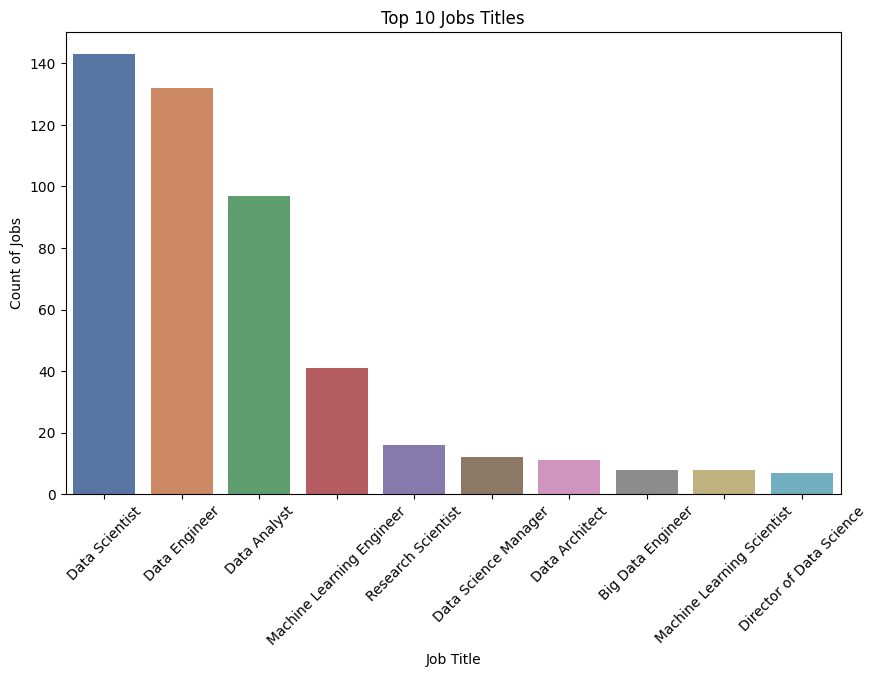

In [97]:
plt.figure(figsize=(10, 6))
sns.barplot(x='job_title',y=0,data = jobs[:10],palette = 'deep', hue='job_title', legend=False)
plt.title('Top 10 Jobs Titles')
plt.xlabel('Job Title')
plt.ylabel('Count of Jobs')
plt.xticks(rotation=45)
plt.show()

<br>
Inicialmente foi realizada uma análise com todos os títulos dos cargos listados no dataset e foi constatado que alguns dos cargos se repetiam (como Machine Learning Engineer e ML Engineer), ou eram muito similares entre si (Director of Data Science, Data Science Manager, Pricipal Data Science, etc.)

Assim, se fez necessário um tratamento dos dados com a finalidade de diminuir esse número de cargos visando facilitar as análises futuras.

Para isto, os cargos foram divididos em quatro grupos: ***Data Science, Data Analyst, Data Engineer e Machine Learn Scientist***, aos quais foram adicionandos os cargos do dataset original.

**Observações:**
É importante destacar que nenhum cargo figurou em mais de um grupo. Para decidir em qual grupo determinado cargo deveria ser adicionado, foi realizada uma pesquisa no google como forma de entender as atribuições de cada cargo, além do uso do chat-gpt para auxiliar nesta divisão. Os cargos muito generalista foram adicionados ao grupo chamado ***Outros (Others)***.

<br>
Unindos os cagos nos grupos: data science, data analyst, data engineer, machine learn scientist e outros...


In [213]:
data_science_list = ['Lead Data Scientist',
                     'Data Science Consultant',
                     'Director of Data Science',
                     'Principal Data Scientist',
                     'Data Science Manager',
                     'Applied Data Scientist',
                     'Data Science Engineer',
                     'Head of Data Science',
                     'Staff Data Scientist',
]

data_analyst_list = ['Product Data Analyst',
                     'Business Data Analyst',
                     'Lead Data Analyst',
                     'BI Data Analyst',
                     'Data Analytics Engineer',
                     'Financial Data Analyst',
                     'Data Analytics Manager',
                     'Finance Data Analyst',
                     'Principal Data Analyst',
                     'Data Analytics Lead',
                     'Marketing Data Analyst'
]

machine_learning_list = ['Machine Learning Engineer',
                         'Machine Learning Manager',
                         'Machine Learning Infrastructure Engineer',
                         'ML Engineer',
                         'Machine Learning Developer',
                         'Applied Machine Learning Scientist',
                         'Lead Machine Learning Engineer',
                         'Head of Machine Learning',
                         'Computer Vision Engineer',
                         'Computer Vision Software Engineer',
                         '3D Computer Vision Researcher',
                         'NLP Engineer',
                         'AI Scientist',
]

data_engineer_list = ['Data Architect',
                      'Lead Data Engineer',
                      'Data Engineering Manager',
                      'Analytics Engineer',
                      'Principal Data Engineer',
                      'Cloud Data Engineer',
                      'Director of Data Engineering',
                      'Big Data Engineer',
                      'Big Data Architect',
                      'ETL Developer'
]

others_list = ['Research Scientist',
               'Head of Data',
               'Data Specialist'
]

modified_df = df.replace(data_science_list, 'Data Scientist').replace(data_analyst_list, 'Data Analyst').replace(machine_learning_list, 'Machine Learning Scientist').replace(data_engineer_list, 'Data Engineer').replace(others_list, 'Others')

In [214]:
# dataframe modificado para agrupar todos os cargos em grupos menores
modified_df['job_title'].value_counts()

job_title
Data Scientist                192
Data Engineer                 176
Data Analyst                  131
Machine Learning Scientist     86
Others                         22
Name: count, dtype: int64

In [215]:
modified_jobs = modified_df.groupby('job_title').size().reset_index().sort_values(by=0,ascending = False)
modified_jobs

,job_title,0
2,Data Scientist,192
1,Data Engineer,176
0,Data Analyst,131
3,Machine Learning Scientist,86
4,Others,22


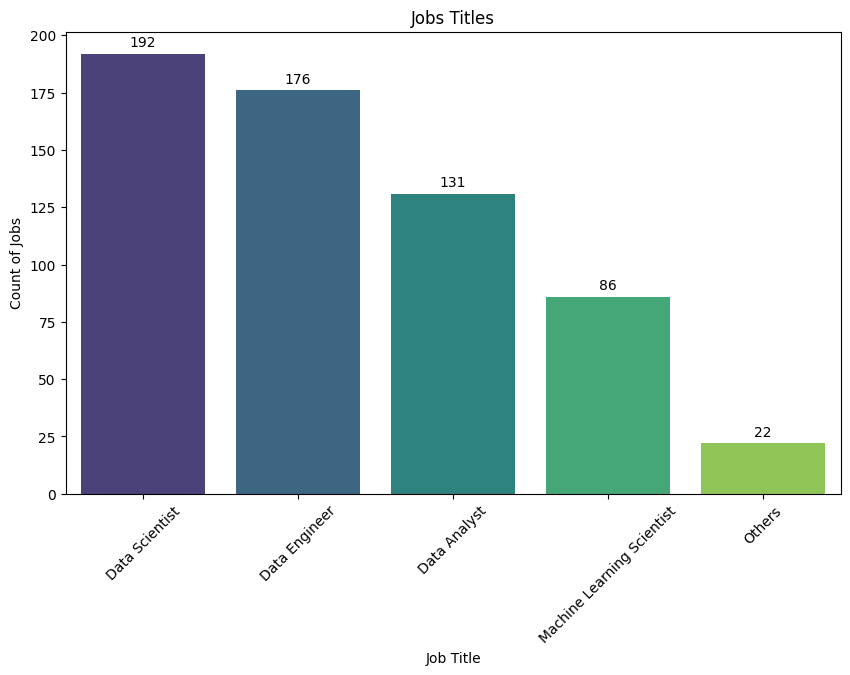

In [216]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='job_title', y=0, data = modified_jobs, palette = 'viridis', hue='job_title', legend=False)

plt.title('Jobs Titles')
plt.xlabel('Job Title')
plt.ylabel('Count of Jobs')
plt.xticks(rotation=45)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                xytext=(0, 3),  # desloca o texto 5 pontos para cima
                textcoords='offset points')

plt.show()

ANALISANDO Número de cargos WORK YEAR

In [217]:
modified_df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,anual_salary_brl,monthly_salary_brl
0,2020,Mid,Full-time,Data Scientist,79833,DE,On-site,DE,Large,411938.28,34328.19
1,2020,Senior,Full-time,Machine Learning Scientist,260000,JP,On-site,JP,Small,1341600.00,111800.00
2,2020,Senior,Full-time,Data Engineer,109024,GB,Hybrid,GB,Medium,562563.84,46880.32
3,2020,Mid,Full-time,Data Analyst,20000,HN,On-site,HN,Small,103200.00,8600.00
4,2020,Senior,Full-time,Machine Learning Scientist,150000,US,Hybrid,US,Large,774000.00,64500.00


In [218]:
modified_df['work_year'].value_counts()

work_year
2022    318
2021    217
2020     72
Name: count, dtype: int64

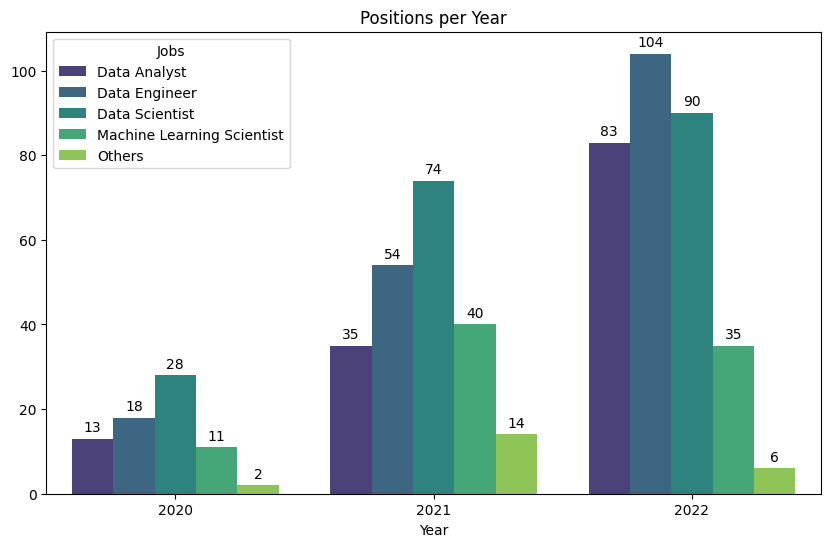

In [219]:

# Contar a quantidade de cada cargo por ano
job_counts = modified_df.groupby(['work_year', 'job_title']).size().reset_index(name='count')

# Criar o gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=job_counts, x='work_year', y='count', hue='job_title', palette='viridis')

# Edição dos títulos do gráfico
plt.title('Positions per Year')
plt.xlabel('Year')
plt.ylabel('')
plt.legend(title='Jobs')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    xytext=(0, 3),  # desloca o texto 5 pontos para cima
                    textcoords='offset points')

plt.show()

No gráfico Positions per Year, é possível notar uma crescente em todos os tipos de cargos cadastrados entre os anos de 2020 até 2022. 

Um certo cuidado deve ser tomado com relação ao ano de 2020 principalmente, pois não há informação acerca do momento em que as informações começaram a ser cadastradas, uma vez que não há uma coluna data ou mês no dataset.

Se considerarmos que os cadastros são dos 12 meses de 2020 e não de parte do ano (p. ex., os cadastros começaram a partir do mês de junho), podemos ver que de 2020 para 2021, houve crescimento, assim com de 2021 para 2022. É importante lembrar que essa época a qual estamos analisando foi a época da pandemia, onde houve um crescimento na área da tecnologia como um todo, sendo esta uma hipótese para os resultados observados.

Outro ponto interessante e que deve ser observado é que os cargos envolvendo machine learning diminuíram de entre os anos de 2021 e 2022. Este é um resultado interessante e até um pouco contraditório, uma vez que o chat-gpt foi lançado em novembro de 2022, sendo este um marco na forma como utilizamos a máquina. Como não há registros para ano de 2023, não é possível verificar se esta tendência se manteve. 

Os crescimentos mais expressivos de 2021 para 2022 foram nos cargos de data analyst e data engineer (mostrar em gráficos com %)

Outro ponto que deve-se destacar é que a falta de uma coluna com datas mais precisas acaba compromentendo determinadas análises e acabamos entrando no ramo das hipóteses para (tentar) justificar os resultados. 

fazendo o comparativo dos cargos a cada ano, em 2020 e 2021, o cargo com maior número de cadastros foi o de Data Scientist, seguido por Data Engineere e Data Analyst. Já em 2022, o cargo de mais cadastros foi o de Data Engineer, seguido por Data Scientist e Data Analyst. Em todos os anos, o cargo de Machine Learning Scientist foi o que apresentou menos cadastros. 

Ao olhar apenas para os valores de porcentagem para cada ano, de 2021 para 2022, houve um crescimento nas posições de analísta (16,13% -> 26,10%) e engenheiro de dados (24,88% -> 32,70%), enquanto cientista de dados (34,10% -> 28,30%) e machine learning (18,43% -> 11,01%) apresentaram retração quando comparados entre si

In [220]:
# Dividindo o DataFrame em 3 grupos
percentage = job_counts['count'].groupby(np.arange(len(job_counts)) // job_counts['job_title'].nunique()).apply(lambda x: x / x.sum() * 100)

# Analise de porcentagem
percentage

0  0     18.055556
   1     25.000000
   2     38.888889
   3     15.277778
   4      2.777778
1  5     16.129032
   6     24.884793
   7     34.101382
   8     18.433180
   9      6.451613
2  10    26.100629
   11    32.704403
   12    28.301887
   13    11.006289
   14     1.886792
Name: count, dtype: float64

Analisando a taxa de trabalho remoto por ano

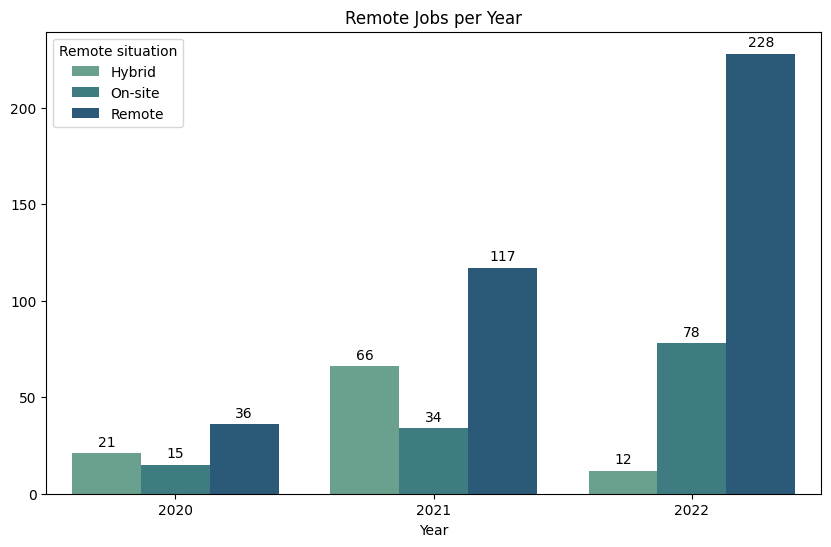

In [257]:
# Contar a quantidade de cada cargo por ano
remote_counts = modified_df.groupby(['work_year', 'remote_ratio']).size().reset_index(name='count')

# Criar o gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=remote_counts, x='work_year', y='count', hue='remote_ratio', palette='crest')

# Edição dos títulos do gráfico
plt.title('Remote Jobs per Year')
plt.xlabel('Year')
plt.ylabel('')
plt.legend(title='Remote situation')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    xytext=(0, 3), 
                    textcoords='offset points')

plt.show()

In [258]:
# Dividindo o DataFrame em 3 grupos
percentage = remote_counts['count'].groupby(np.arange(len(remote_counts)) // remote_counts['remote_ratio'].nunique()).apply(lambda x: x / x.sum() * 100)

percentage

0  0    29.166667
   1    20.833333
   2    50.000000
1  3    30.414747
   4    15.668203
   5    53.917051
2  6     3.773585
   7    24.528302
   8    71.698113
Name: count, dtype: float64

Analisando o gráfico Remote Jobs per Year, é possível ver um maior número de valores para trabalho remoto de 2021 para 2022, mesmo sabendo que houve um crescimento de cadastros como um todo de um ano para o outro.

Os resultados mais interessantes estão nas porcentagens... em 2020 o modelo presencial detinha 20,83%, em 2021 foi para 15,67% e em 2022 para 24,53%. O que podemos pensar, mais uma vez, remete ao período da pandemia covid-19, onde as muitas empresas tiveram que aderir ao trabalho remoto, sendo uma possível causa para os baixos valores apresentados em 2021. 

O fim da pandemia, seria a causa para o possível crescimento em 2022. Já o modelo híbrido se manteve estável em 2020 e 2021. Mas apresentou um grande decaimento em 2022, constrastando com o grande crescimento do modelo remoto em 2022. O motivo para tal comportamento necessida de ser averiguado. 

Relacionando os cargos com a respectiva situação de trabalho: presencial, híbirda e remota

In [253]:
modified_df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,anual_salary_brl,monthly_salary_brl
0,2020,Mid,Full-time,Data Scientist,79833,DE,On-site,DE,Large,411938.28,34328.19
1,2020,Senior,Full-time,Machine Learning Scientist,260000,JP,On-site,JP,Small,1341600.00,111800.00
2,2020,Senior,Full-time,Data Engineer,109024,GB,Hybrid,GB,Medium,562563.84,46880.32
3,2020,Mid,Full-time,Data Analyst,20000,HN,On-site,HN,Small,103200.00,8600.00
4,2020,Senior,Full-time,Machine Learning Scientist,150000,US,Hybrid,US,Large,774000.00,64500.00


In [254]:
# Relacionar cargos com home office
job_remote_situation = modified_df.groupby(['job_title', 'remote_ratio']).size().reset_index(name='count')
job_remote_situation


,job_title,remote_ratio,count
0,Data Analyst,Hybrid,11
1,Data Analyst,On-site,25
2,Data Analyst,Remote,95
3,Data Engineer,Hybrid,19
4,Data Engineer,On-site,36
5,Data Engineer,Remote,121
6,Data Scientist,Hybrid,34
7,Data Scientist,On-site,49
8,Data Scientist,Remote,109
9,Machine Learning Scientist,Hybrid,25


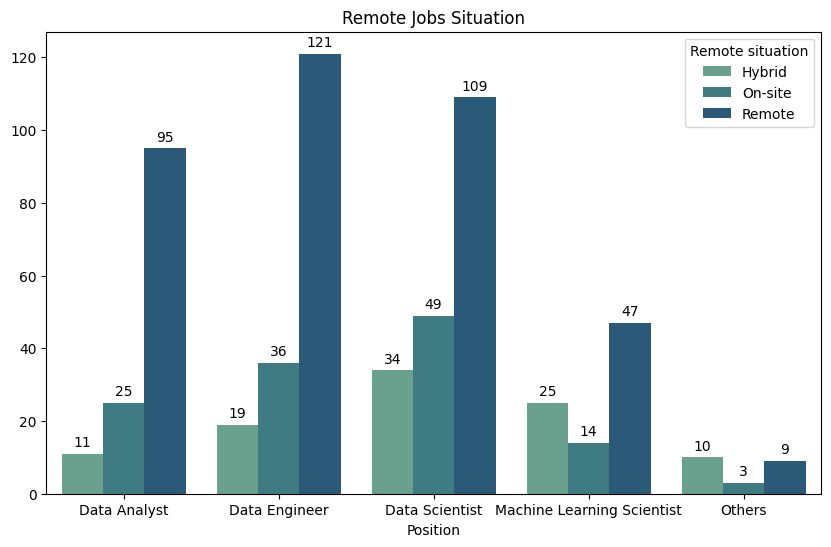

In [255]:
# Criar o gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=job_remote_situation, x='job_title', y='count', hue='remote_ratio', palette='crest')

# Edição dos títulos do gráfico
plt.title('Remote Jobs Situation')
plt.xlabel('Position')
plt.ylabel('')
plt.legend(title='Remote situation')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    xytext=(0, 3), 
                    textcoords='offset points')

plt.show()

In [256]:
# Dividindo o DataFrame em 3 grupos
percentage = job_remote_situation['count'].groupby(np.arange(len(job_remote_situation)) // job_remote_situation['remote_ratio'].nunique()).apply(lambda x: x / x.sum() * 100)
percentage

0  0      8.396947
   1     19.083969
   2     72.519084
1  3     10.795455
   4     20.454545
   5     68.750000
2  6     17.708333
   7     25.520833
   8     56.770833
3  9     29.069767
   10    16.279070
   11    54.651163
4  12    45.454545
   13    13.636364
   14    40.909091
Name: count, dtype: float64

Como pode ser visto no gráfico, a maioria dos profissionais está trabalhando no modelo remoto. Com execeção de machine learning, o modelo presencial supera o híbrido. Como vimos anteriormente, a queda na contagem do modelo híbrido ocorreu principalmente no ano de 2022.

Destaque para os cargos de data analyst e data engineer que apresentaram taxas de trabalho no modelo remoto de 72,52% e 68,75%, respectivamente

Relacionando o tipo de cargo com o nível do profissional

In [259]:
modified_df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,anual_salary_brl,monthly_salary_brl
0,2020,Mid,Full-time,Data Scientist,79833,DE,On-site,DE,Large,411938.28,34328.19
1,2020,Senior,Full-time,Machine Learning Scientist,260000,JP,On-site,JP,Small,1341600.00,111800.00
2,2020,Senior,Full-time,Data Engineer,109024,GB,Hybrid,GB,Medium,562563.84,46880.32
3,2020,Mid,Full-time,Data Analyst,20000,HN,On-site,HN,Small,103200.00,8600.00
4,2020,Senior,Full-time,Machine Learning Scientist,150000,US,Hybrid,US,Large,774000.00,64500.00


In [260]:
modified_df_experience = modified_df.replace('EN', 'Entry level').replace('MI', 'Mid level').replace('SE', 'Senior level').replace('EX', 'Executive level/Director')

job_experience = modified_df_experience.groupby(['job_title', 'experience_level']).size().reset_index(name='count')
job_experience

,job_title,experience_level,count
0,Data Analyst,Entry,18
1,Data Analyst,Executive,3
2,Data Analyst,Mid,42
3,Data Analyst,Senior,68
4,Data Engineer,Entry,15
5,Data Engineer,Executive,9
6,Data Engineer,Mid,64
7,Data Engineer,Senior,88
8,Data Scientist,Entry,28
9,Data Scientist,Executive,11


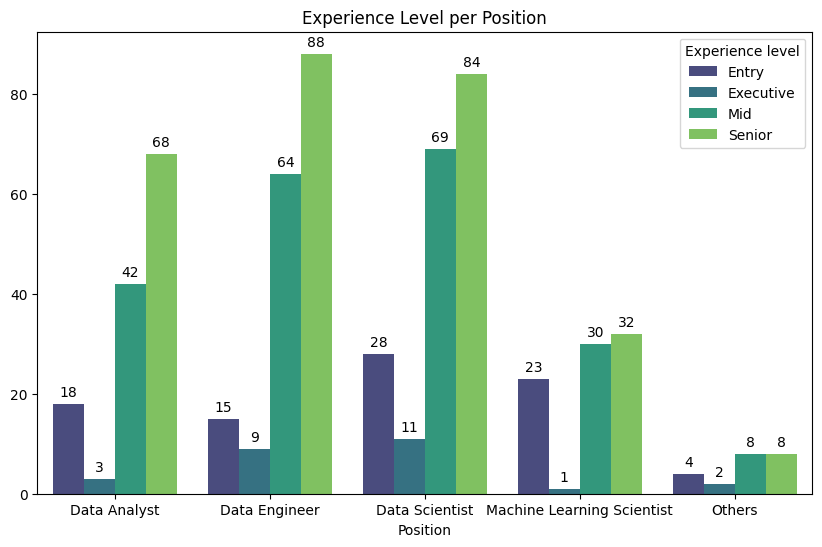

In [261]:
# Criar o gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=job_experience, x='job_title', y='count', hue='experience_level', palette='viridis')

# Edição dos títulos do gráfico
plt.title('Experience Level per Position')
plt.xlabel('Position')
plt.ylabel('')
plt.legend(title='Experience level')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    xytext=(0, 3), 
                    textcoords='offset points')

plt.show()

Como esperado, o número de cargos executivos e diretore são os menores, sendo comum haver poucos nas empresas. Já os cargos de nível senior foram os que apresentaram o maior número de registros, seguidos pelo cargos Mid level (o equivalente ao nosso pleno) e pelos cargos de entrarda (o equivalente ao nosso Junior). detalhe para os cargos de machine learning que apresentaram valores muito próximos entre si para os cargos Entry, Mid e Senior.

In [262]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,anual_salary_brl,monthly_salary_brl,categories
0,2020,Mid,Full-time,Data Scientist,79833,DE,On-site,DE,Large,411938.28,34328.19,Scientist
1,2020,Senior,Full-time,Machine Learning Scientist,260000,JP,On-site,JP,Small,1341600.00,111800.00,Scientist
2,2020,Senior,Full-time,Big Data Engineer,109024,GB,Hybrid,GB,Medium,562563.84,46880.32,Engineer
3,2020,Mid,Full-time,Product Data Analyst,20000,HN,On-site,HN,Small,103200.00,8600.00,Data Analyst
4,2020,Senior,Full-time,Machine Learning Engineer,150000,US,Hybrid,US,Large,774000.00,64500.00,Engineer


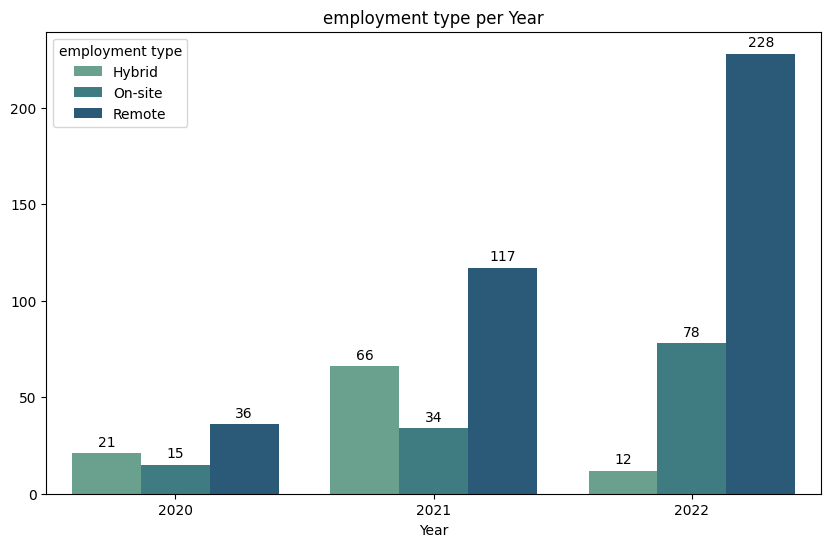

In [264]:
# Contar a quantidade de cada cargo por ano
job_counts = modified_df.groupby(['work_year', 'remote_ratio']).size().reset_index(name='count')

# Criar o gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=job_counts, x='work_year', y='count', hue='remote_ratio', palette='crest')

# Edição dos títulos do gráfico
plt.title('employment type per Year')
plt.xlabel('Year')
plt.ylabel('')
plt.legend(title='employment type')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    xytext=(0, 3),  # desloca o texto 5 pontos para cima
                    textcoords='offset points')

plt.show()

### Qual o grau de Senioridade dos profissionais de dados?

In [227]:
levels = df.experience_level.value_counts()
levels

experience_level
Senior       280
Mid          213
Entry         88
Executive     26
Name: count, dtype: int64

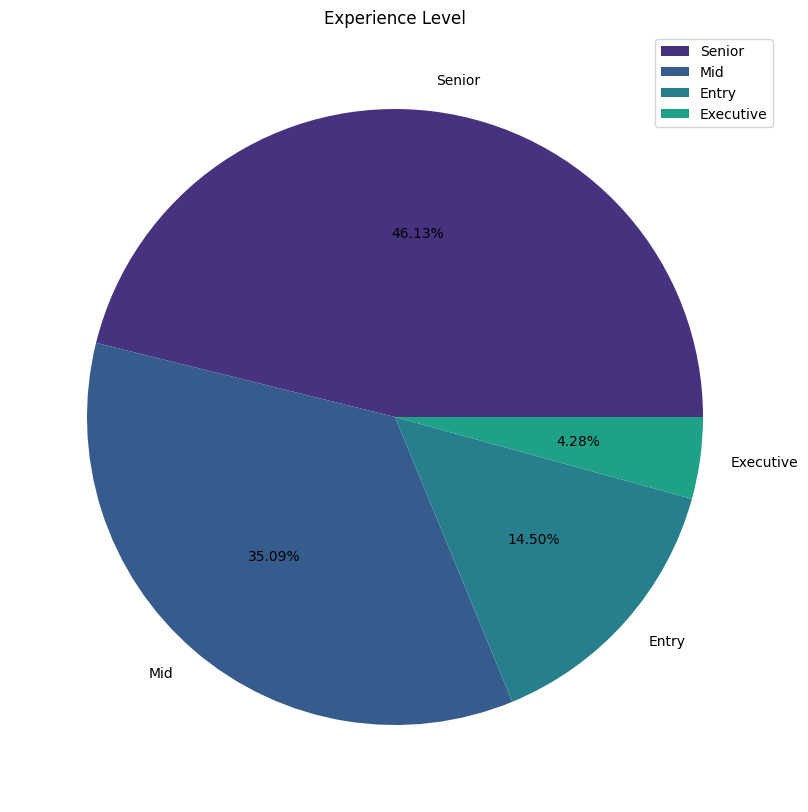

In [228]:
plt.figure(figsize=(15, 10))
plt.pie(x= levels, labels= levels.index, autopct= '%1.2f%%')
plt.title('Experience Level')
plt.legend()
plt.show()

Observação:

Com a análise desse gráfico se nota uma maior participação de profissionais seniores

# Análise de outliers

A análise de outliers em um dataset é uma etapa essencial no processo de análise de dados, pois esses valores extremos podem fornecer informações valiosas ou, em alguns casos, distorcer os resultados de uma análise. Entender e tratar esses outliers adequadamente é crucial para obter resultados mais precisos e confiáveis.

In [232]:
df_outlier = modified_df
df_outlier

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,anual_salary_brl,monthly_salary_brl
0,2020,Mid,Full-time,Data Scientist,79833,DE,On-site,DE,Large,411938.28,34328.19
1,2020,Senior,Full-time,Machine Learning Scientist,260000,JP,On-site,JP,Small,1341600.00,111800.00
2,2020,Senior,Full-time,Data Engineer,109024,GB,Hybrid,GB,Medium,562563.84,46880.32
3,2020,Mid,Full-time,Data Analyst,20000,HN,On-site,HN,Small,103200.00,8600.00
4,2020,Senior,Full-time,Machine Learning Scientist,150000,US,Hybrid,US,Large,774000.00,64500.00
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,Senior,Full-time,Data Engineer,154000,US,Remote,US,Medium,796180.00,66348.33
603,2022,Senior,Full-time,Data Engineer,126000,US,Remote,US,Medium,651420.00,54285.00
604,2022,Senior,Full-time,Data Analyst,129000,US,On-site,US,Medium,666930.00,55577.50
605,2022,Senior,Full-time,Data Analyst,150000,US,Remote,US,Medium,775500.00,64625.00


In [233]:

# Função que encontra os outliers de uma coluna específica do df
def outliers(df_plot, coluna):
    dados = df_plot[coluna]

    q1 = np.quantile(dados, 0.25)
    q3 = np.quantile(dados, 0.75)

    iqr = q3 - q1

    dados_outliers = dados[(dados < q1 - 1.5*iqr) | (dados > q3 + 1.5*iqr)]

    return dados_outliers

In [234]:
# Função para encontrar o limite inferior e o superior para aplicar nos gráficos
def limites(coluna):

    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    iqr = q3 - q1
    limite_inferior = q1 - 1.5*iqr
    limite_superior = q3 + 1.5*iqr
    return limite_inferior, limite_superior


In [235]:
# Função para excluir os outliers e excluir os tipo de trabalho que não são FT
def excluir_outliers(df_plot, coluna):
    qtd_linhas = df_plot.shape[0]
    limite_inferior, limite_superior = limites(df_plot[coluna])
    df_plot = df_plot[(df_plot[coluna] >= limite_inferior) & (df_plot[coluna] <= limite_superior)]
    df_plot = df_plot.drop(df_plot[df_plot['employment_type'] != 'Full-time'].index)
    linhas_removidas = qtd_linhas - df_plot.shape[0]

    print(f'Foram removidas {linhas_removidas} linhas')
    return df_plot

In [236]:

# Função para criar o boxplot passando um coluna específica
def diagrama_caixa(coluna):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    sns.boxplot(x=coluna, ax=ax1, hue = ax1, palette='crest', legend=False)
    ax2.set_xlim(limites(coluna))
    sns.boxplot(x=coluna, ax=ax2, hue = ax2, palette='crest', legend=False)


In [237]:
# Função para criar um histograma passando um coluna específica para cada nível de experiência
def histograma_level(coluna):
    sns.displot(x=coluna, kde=True, hue = df_outlier['experience_level'], height=5, aspect=3)

In [ ]:
# Função para criar um histograma passando um coluna específica para o tamanho da empresa
def histograma_size(coluna):
    sns.displot(x=coluna, kde=True, hue = df_outlier['company_size'], height=5, aspect=3)

In [238]:
# Função para criar um histograma passando um coluna específica
def histograma(coluna):
    sns.displot(x=coluna, kde=True, height=5, aspect=3)

## Por que analisar os outliers?

- Identificar de erros ou anomalias
- Observar comportamentos incomuns
- Impacto nas métricas estatísticas

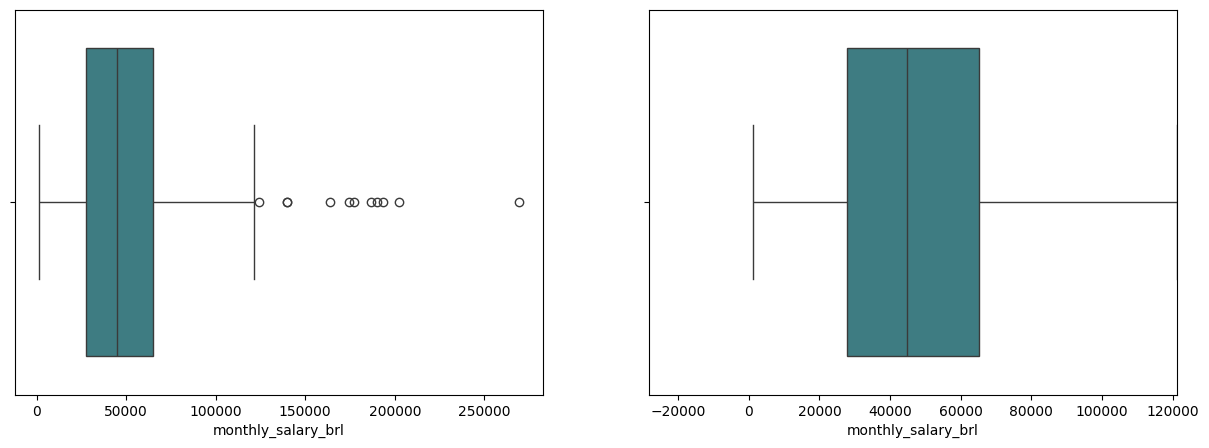

In [239]:
# Criando 2 gráficos lado a lado com e sem os outliers
diagrama_caixa(df_outlier['monthly_salary_brl'])

In [240]:
# Mostra somente o df dos outliers
resultado = outliers(df_outlier, 'monthly_salary_brl')
df_plot_outliers = df_outlier[df_outlier['monthly_salary_brl'].isin(resultado)]
df_plot_outliers

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,anual_salary_brl,monthly_salary_brl
25,2020,Executive,Full-time,Data Scientist,325000,US,Remote,US,Large,1677000.0,139750.00
33,2020,Mid,Full-time,Others,450000,US,On-site,US,Medium,2322000.0,193500.00
63,2020,Senior,Full-time,Data Scientist,412000,US,Remote,US,Large,2125920.0,177160.00
93,2021,Senior,Full-time,Data Engineer,276000,US,On-site,US,Large,1487640.0,123970.00
97,2021,Mid,Full-time,Data Analyst,450000,US,Remote,US,Large,2425500.0,202125.00
157,2021,Mid,Full-time,Machine Learning Scientist,423000,US,Hybrid,US,Large,2279970.0,189997.50
225,2021,Executive,Contract,Data Scientist,416000,US,Remote,US,Small,2242240.0,186853.33
252,2021,Executive,Full-time,Data Engineer,600000,US,Remote,US,Large,3234000.0,269500.00
482,2022,Executive,Full-time,Data Engineer,324000,US,Remote,US,Medium,1675080.0,139590.00
519,2022,Senior,Full-time,Data Scientist,380000,US,Remote,US,Large,1964600.0,163716.67


**Como o resultado dos outliers é pequeno em relação ao tamanho da nossa amostra (<5%) uma das formas de tratar seria apenas removê-los da base de dados, mas antes disso testamos os impactos desses outliers nas análises**

A média com os outliers é de R$ 49026.65


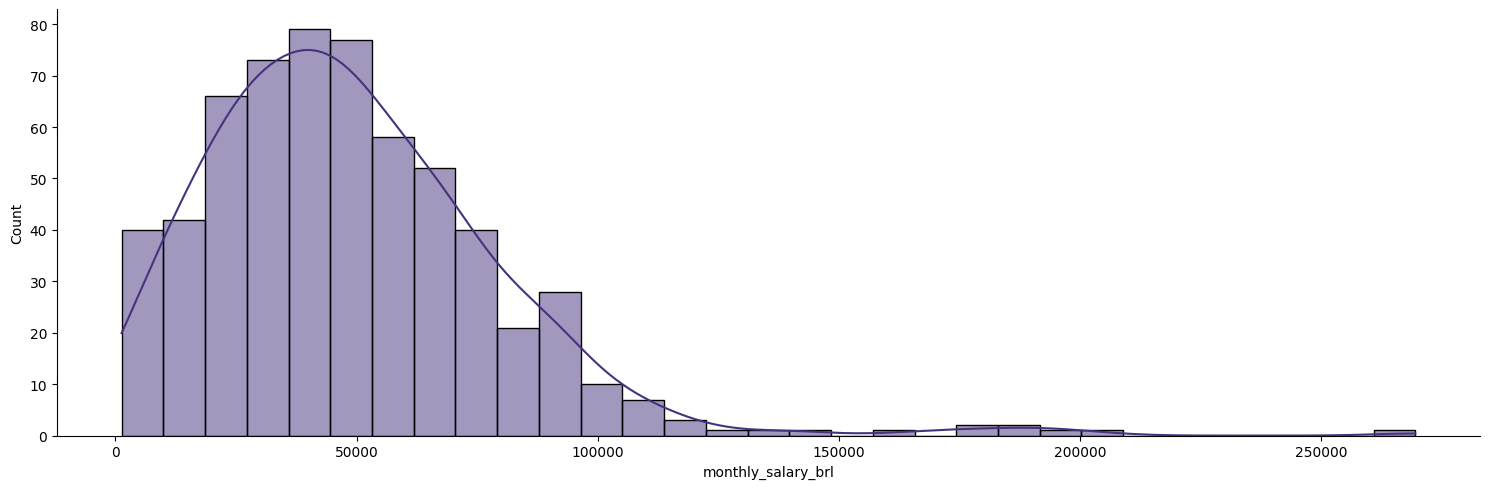

In [241]:
# Cria um histograma com todos os dados, inclusive os outliers
histograma(df_outlier['monthly_salary_brl'])
media = df_outlier['monthly_salary_brl'].mean().round(2)
print(f'A média com os outliers é de R$ {media}')

In [242]:
# Exclui os outliers do df
df_plot_out = excluir_outliers(df_outlier, 'monthly_salary_brl')
df_plot_out

Foram removidas 29 linhas


,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,anual_salary_brl,monthly_salary_brl
0,2020,Mid,Full-time,Data Scientist,79833,DE,On-site,DE,Large,411938.28,34328.19
1,2020,Senior,Full-time,Machine Learning Scientist,260000,JP,On-site,JP,Small,1341600.00,111800.00
2,2020,Senior,Full-time,Data Engineer,109024,GB,Hybrid,GB,Medium,562563.84,46880.32
3,2020,Mid,Full-time,Data Analyst,20000,HN,On-site,HN,Small,103200.00,8600.00
4,2020,Senior,Full-time,Machine Learning Scientist,150000,US,Hybrid,US,Large,774000.00,64500.00
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,Senior,Full-time,Data Engineer,154000,US,Remote,US,Medium,796180.00,66348.33
603,2022,Senior,Full-time,Data Engineer,126000,US,Remote,US,Medium,651420.00,54285.00
604,2022,Senior,Full-time,Data Analyst,129000,US,On-site,US,Medium,666930.00,55577.50
605,2022,Senior,Full-time,Data Analyst,150000,US,Remote,US,Medium,775500.00,64625.00


A média sem os outliers é de R$ 47309.89


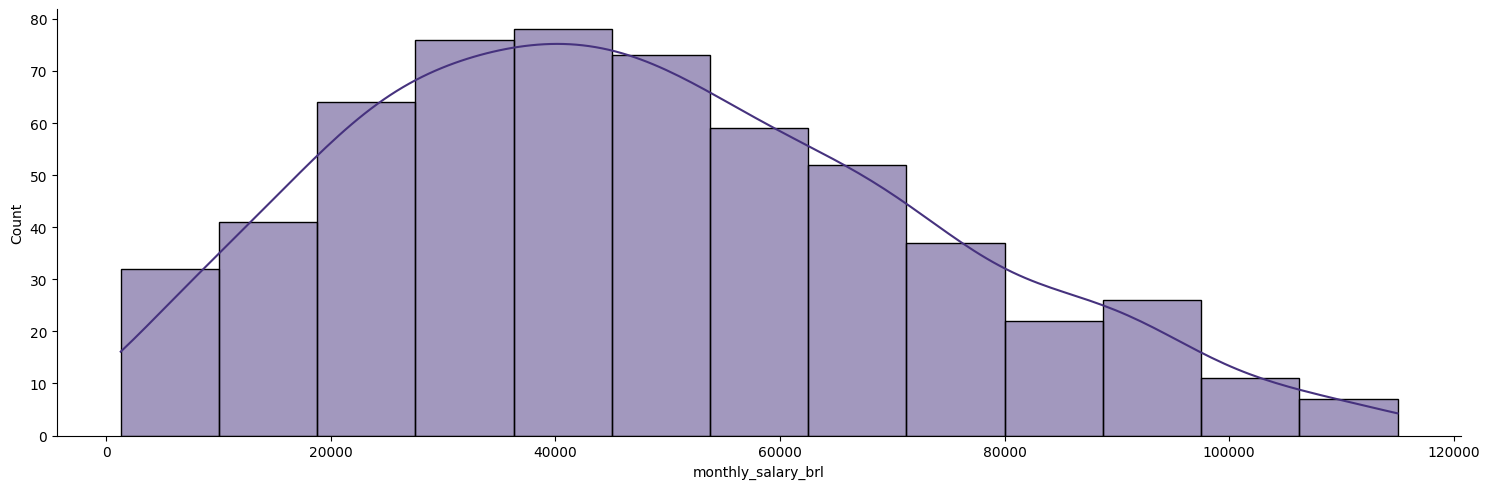

In [243]:
# Cria o histograma sem os outliers
histograma(df_plot_out['monthly_salary_brl'])
media_out = df_plot_out['monthly_salary_brl'].mean().round(2)
print(f'A média sem os outliers é de R$ {media_out}')

A média salarial com os outliers para cada nível de experiência é de:
Entry = R$ 27124.64
MID = R$ 38563.12
Senior = R$ 60285.54
Executive = R$ 87627.28


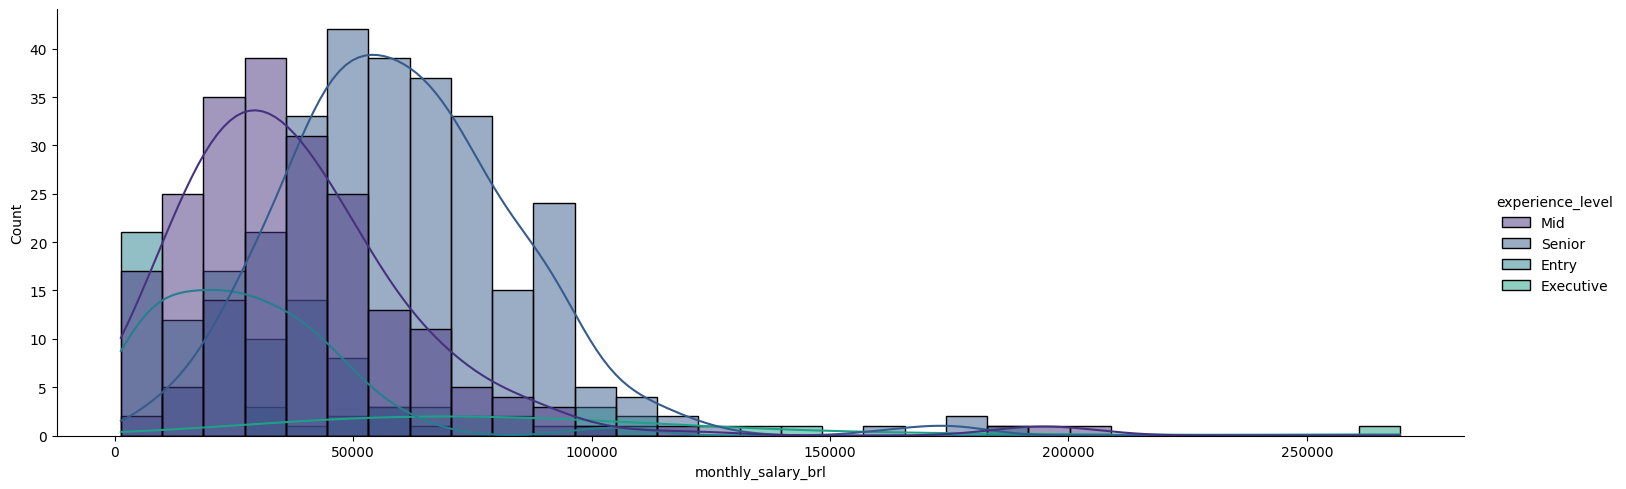

In [244]:
# Cria o histograma sem os outliers para cada nível de experiência
histograma_level(modified_df['monthly_salary_brl'])
df_level = modified_df.groupby(['experience_level'])
media_level = list(df_level['monthly_salary_brl'].mean().round(2))
print('A média salarial com os outliers para cada nível de experiência é de:')
print(f'Entry = R$ {media_level[0]}')
print(f'MID = R$ {media_level[2]}')
print(f'Senior = R$ {media_level[3]}')
print(f'Executive = R$ {media_level[1]}')

A média salarial com os outliers para cada tamanho de empresa é de:
S = R$ 52661.88
M = R$ 34239.12
L = R$ 50583.66


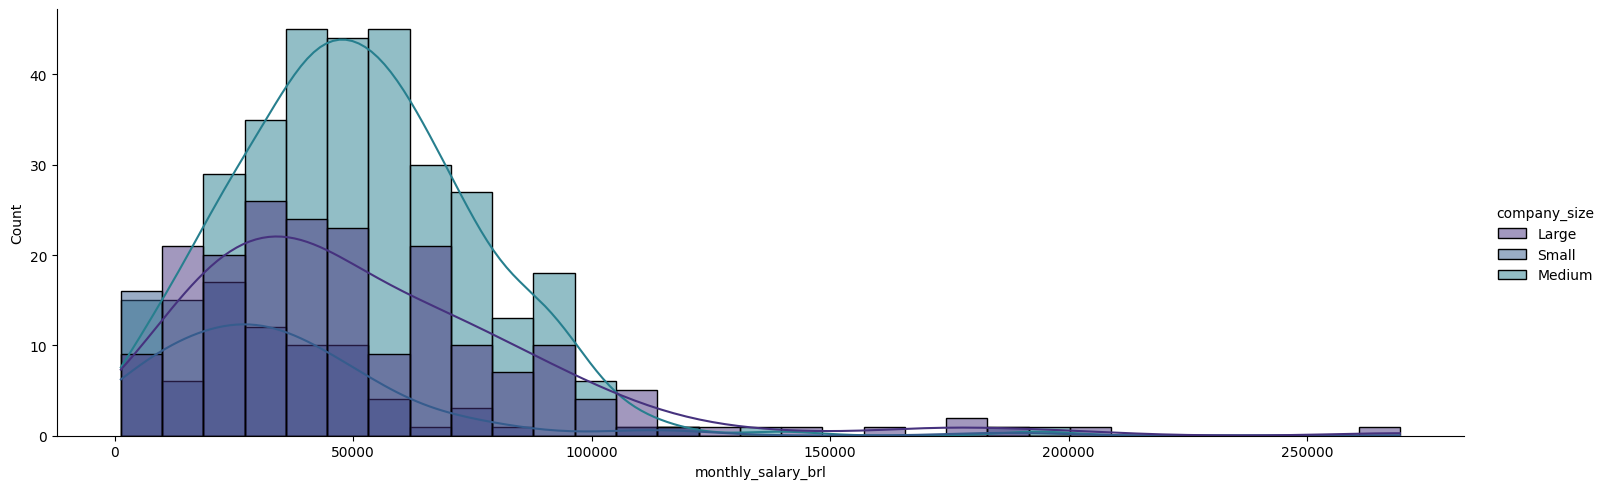

In [98]:
# Cria o histograma com os outliers para cada tamanho de empresa
histograma_size(modified_df['monthly_salary_brl'])
df_size = modified_df.groupby(['company_size'])
media_size = list(df_size['monthly_salary_brl'].mean().round(2))
print('A média salarial com os outliers para cada tamanho de empresa é de:')
print(f'S = R$ {media_size[0]}')
print(f'M = R$ {media_size[2]}')
print(f'L = R$ {media_size[1]}')

A média salarial com os outliers para cada tamanho de empresa é de:
S = R$ 47341.0
M = R$ 33698.32
L = R$ 50608.42


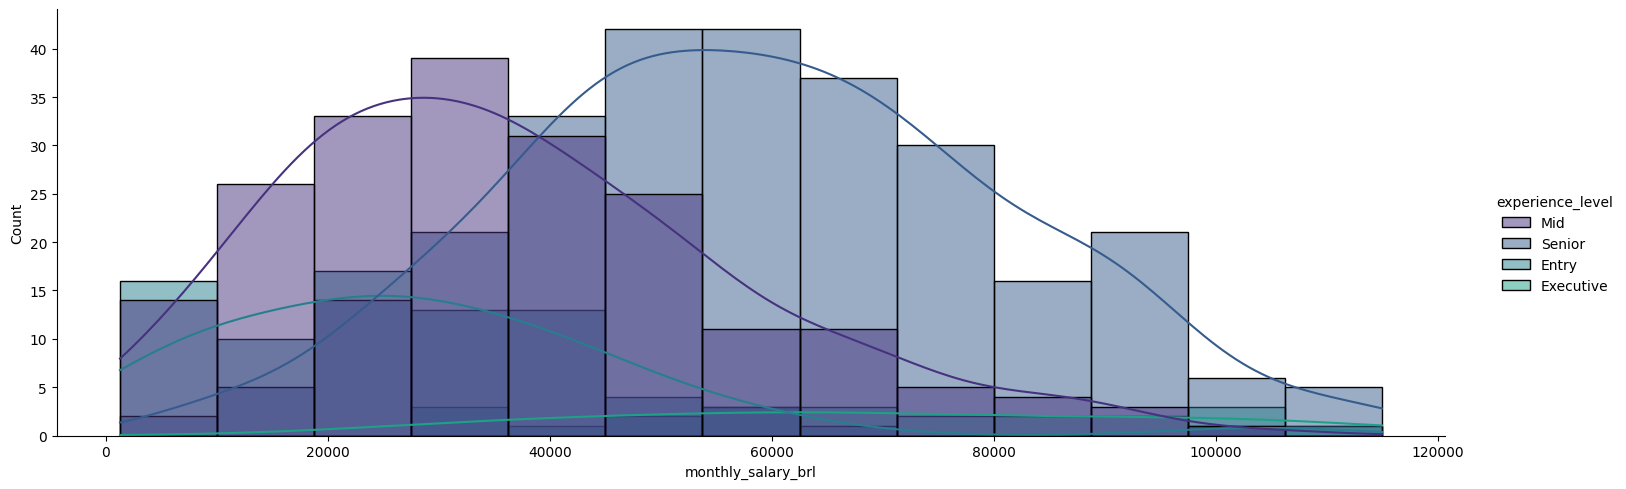

In [99]:
# Cria o histograma sem os outliers para cada tamanho de empresa
histograma_level(df_plot_out['monthly_salary_brl'])
df_size = df_plot_out.groupby(['company_size'])
media_size = list(df_size['monthly_salary_brl'].mean().round(2))
print('A média salarial com os outliers para cada tamanho de empresa é de:')
print(f'S = R$ {media_size[0]}')
print(f'M = R$ {media_size[2]}')
print(f'L = R$ {media_size[1]}')

**Portanto, analisar e tratar os outliers de forma adequada garante que os insights extraídos dos dados sejam mais precisos e que os modelos gerados sejam mais robustos e confiáveis.**

# **Análises sobre a coluna "Categories"**

A fim de simplificar a análise e facilitar a interpretação dos dados, foi criada uma nova coluna categorizada intitulada "Categories". Essa coluna agrupa os diversos cargos presentes na coluna original "job_title", que apresentava 50 valores únicos, tornando a análise complexa.
As oito categorias definidas – Engineer, Scientist, Data Analyst, Leadership, Architect, Consultant, Developer e Other – foram estabelecidas com base em uma hierarquia de cargos, proporcionando uma visão mais granular dos dados.

In [245]:
# Criando o dicionário de mapeamento
categories = {
    '3D Computer Vision Researcher': 'Other',
    'AI Scientist': 'Scientist',
    'Analytics Engineer': 'Engineer',
    'Applied Data Scientist': 'Scientist',
    'Applied Machine Learning Scientist': 'Scientist',
    'BI Data Analyst': 'Data Analyst',
    'Big Data Architect': 'Architect',
    'Big Data Engineer': 'Engineer',
    'Business Data Analyst': 'Data Analyst',
    'Cloud Data Engineer': 'Engineer',
    'Computer Vision Engineer': 'Engineer',
    'Computer Vision Software Engineer': 'Engineer',
    'Data Analyst': 'Data Analyst',
    'Data Analytics Engineer': 'Engineer',
    'Data Analytics Lead': 'Leadership',
    'Data Analytics Manager': 'Leadership',
    'Data Architect': 'Architect',
    'Data Engineer': 'Engineer',
    'Data Engineering Manager': 'Leadership',
    'Data Science Consultant': 'Consultant',
    'Data Science Engineer': 'Engineer',
    'Data Science Manager': 'Leadership',
    'Data Scientist': 'Scientist',
    'Data Specialist': 'Other',
    'Director of Data Engineering': 'Engineer',
    'Director of Data Science': 'Leadership',
    'ETL Developer': 'Developer',
    'Finance Data Analyst': 'Data Analyst',
    'Financial Data Analyst': 'Data Analyst',
    'Head of Data': 'Leadership',
    'Head of Data Science': 'Leadership',
    'Head of Machine Learning': 'Leadership',
    'Lead Data Analyst': 'Leadership',
    'Lead Data Engineer': 'Leadership',
    'Lead Data Scientist': 'Leadership',
    'Lead Machine Learning Engineer': 'Leadership',
    'Machine Learning Developer': 'Developer',
    'Machine Learning Engineer': 'Engineer',
    'Machine Learning Infrastructure Engineer': 'Engineer',
    'Machine Learning Manager': 'Leadership',
    'Machine Learning Scientist': 'Scientist',
    'Marketing Data Analyst': 'Data Analyst',
    'ML Engineer': 'Engineer',
    'NLP Engineer': 'Engineer',
    'Principal Data Analyst': 'Data Analyst',
    'Principal Data Engineer': 'Engineer',
    'Principal Data Scientist': 'Scientist',
    'Product Data Analyst': 'Data Analyst',
    'Research Scientist': 'Scientist',
    'Staff Data Scientist': 'Scientist'
}

In [246]:
#Adicionando a nova coluna 'categoria' ao DataFrame
df['categories'] = df['job_title'].map(categories).fillna('Outros')
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,anual_salary_brl,monthly_salary_brl,categories
0,2020,Mid,Full-time,Data Scientist,79833,DE,On-site,DE,Large,411938.28,34328.19,Scientist
1,2020,Senior,Full-time,Machine Learning Scientist,260000,JP,On-site,JP,Small,1341600.00,111800.00,Scientist
2,2020,Senior,Full-time,Big Data Engineer,109024,GB,Hybrid,GB,Medium,562563.84,46880.32,Engineer
3,2020,Mid,Full-time,Product Data Analyst,20000,HN,On-site,HN,Small,103200.00,8600.00,Data Analyst
4,2020,Senior,Full-time,Machine Learning Engineer,150000,US,Hybrid,US,Large,774000.00,64500.00,Engineer
...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,Senior,Full-time,Data Engineer,154000,US,Remote,US,Medium,796180.00,66348.33,Engineer
603,2022,Senior,Full-time,Data Engineer,126000,US,Remote,US,Medium,651420.00,54285.00,Engineer
604,2022,Senior,Full-time,Data Analyst,129000,US,On-site,US,Medium,666930.00,55577.50,Data Analyst
605,2022,Senior,Full-time,Data Analyst,150000,US,Remote,US,Medium,775500.00,64625.00,Data Analyst


In [247]:
df['categories'].value_counts()

categories
Engineer        218
Scientist       191
Data Analyst    116
Leadership       56
Architect        12
Consultant        7
Developer         5
Other             2
Name: count, dtype: int64

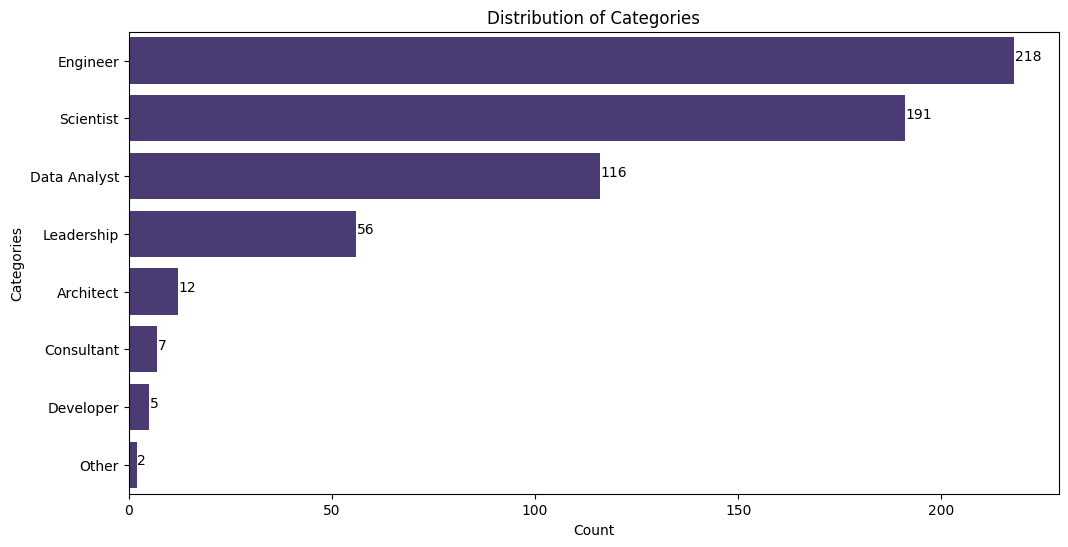

In [248]:
# Contando a frequência de cada categoria e ordenando em ordem decrescente
category_counts = df['categories'].value_counts().sort_values(ascending=False)

# Criando o gráfico de barras horizontais
plt.figure(figsize=(12,6))
ax = sns.barplot(y=category_counts.index, x=category_counts, orient='h')

# Adicionando os valores absolutos ao final de cada barra
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.1, p.get_y() + p.get_height() / 2, '{:1.0f}'.format(width), ha='left')

plt.title('Distribution of Categories')
plt.xlabel('Count')
plt.ylabel('Categories')
plt.show()

**Salário médio por categoria**

O gráfico de boxplot revela uma clara disparidade salarial entre as diferentes categorias profissionais.

Cientistas e engenheiros, em geral, possuem salários mais altos e com menor variação, indicando uma remuneração mais consistente nessas áreas. Por outro lado, consultores apresentam uma maior dispersão salarial, com alguns profissionais recebendo salários muito acima da média.

Cargos de liderança se destacam pelos salários mais elevados e com menor variação, sugerindo uma maior padronização na remuneração para esses níveis hierárquicos. As demais categorias, como desenvolvedores e arquitetos, tendem a apresentar salários mais baixos.

É importante notar a presença de outliers em algumas categorias, indicando que existem profissionais com salários significativamente acima ou abaixo da média, o que pode ser explicado por fatores como experiência, habilidades específicas, negociação individual ou tamanho da empresa.

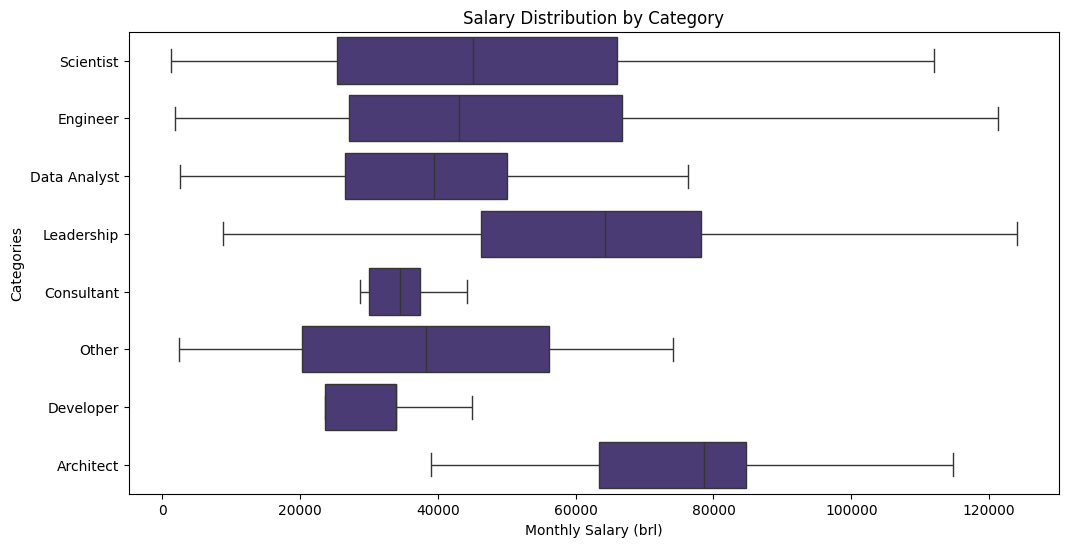

In [100]:
# Calcular o salário médio por categoria
salarios_medios = df.groupby('categories')['anual_salary_brl'].mean().sort_values(ascending=False)

# Plotar um gráfico de barras
plt.figure(figsize=(12, 6))
sns.boxplot(x="monthly_salary_brl", y="categories", data=df,showfliers=False)
plt.title("Salary Distribution by Category")
plt.xlabel("Monthly Salary (brl)")
plt.ylabel("Categories")
plt.show()

**Análise distribuição salarial por nível de experiência**

O gráfico de boxplot revela uma clara relação entre o nível de experiência e a remuneração mensal. Profissionais com maior experiência tendem a receber salários mais elevados, especialmente em áreas como Engenharia e Tecnologia da Informação. Essa tendência indica que a experiência é um fator determinante na definição da remuneração.

No entanto, a remuneração não é determinada apenas pela experiência. Outros fatores, como a especificidade da função, o porte da empresa e a demanda do mercado por determinadas habilidades, também influenciam a distribuição salarial. A presença de outliers sugere que profissionais com habilidades altamente especializadas ou em posições de liderança podem receber salários significativamente acima da média.

Em resumo, a experiência é um forte indicador de remuneração, mas não o único. Outros fatores, como a demanda do mercado por determinadas habilidades e a posição hierárquica, também influenciam a distribuição salarial mensal.

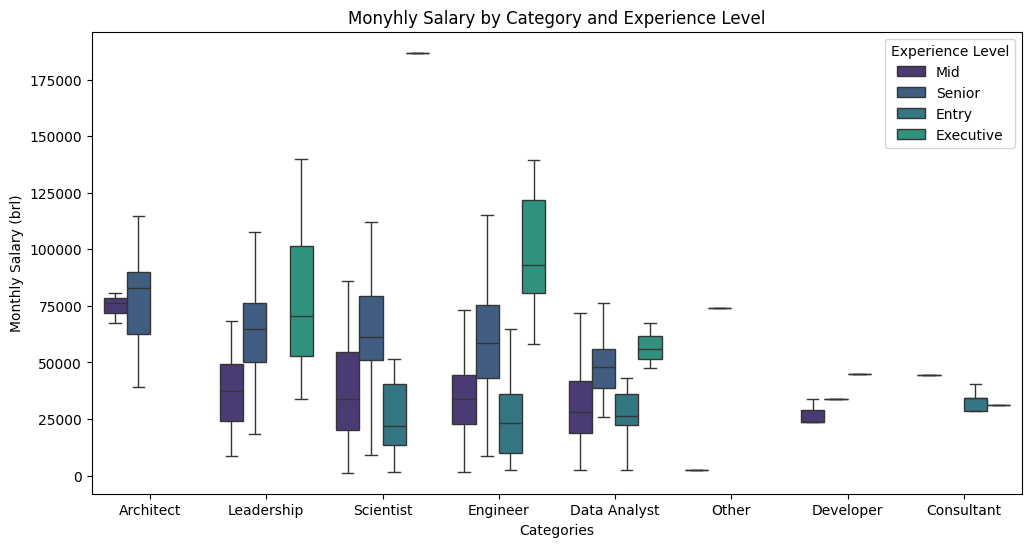

In [250]:
# Criando o boxplot com as categorias ordenadas e níveis de experiência
plt.figure(figsize=(12, 6))
sns.set_palette("viridis")
sns.boxplot(x='categories', y='monthly_salary_brl', hue='experience_level', data=df, order=salarios_medios.index, showfliers=False)
plt.title('Monthly Salary by Category and Experience Level')
plt.xlabel('Categories')
plt.ylabel('Monthly Salary (brl)')
plt.legend(title='Experience Level')
plt.show()

**Análise do Gráfico: Trabalho Remoto em Números**

O gráfico mostra um crescimento significativo do trabalho remoto nos últimos anos, principalmente em 2022. É interessante notar que essa tendência se acelerou em diversas áreas profissionais, mas com ritmos diferentes.

O trabalho híbrido também ganhou força, indicando que muitas empresas estão buscando um equilíbrio entre a flexibilidade do trabalho remoto e a colaboração presencial.

Em resumo, os dados evidenciam uma transformação na forma como trabalhamos, com o trabalho remoto se consolidando como uma nova realidade para muitos profissionais.

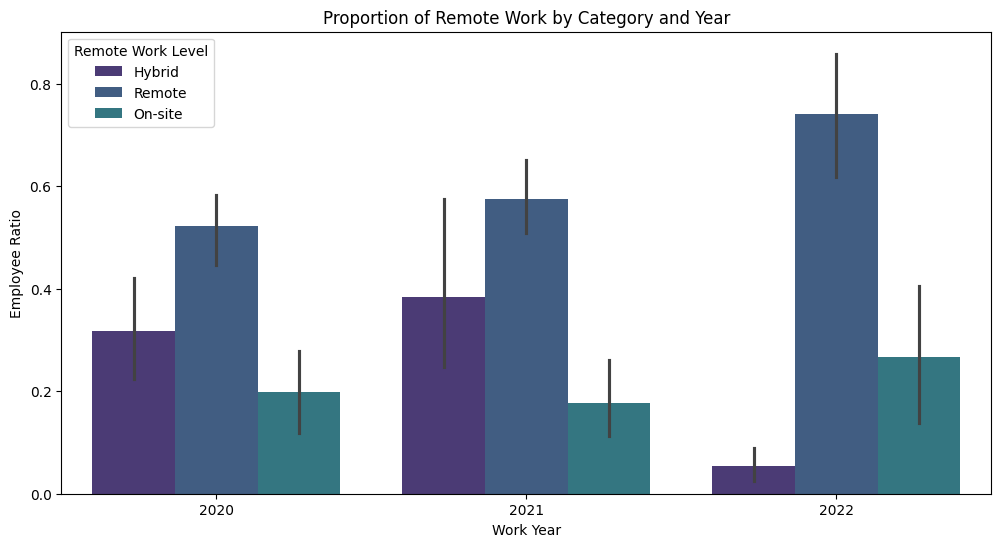

In [251]:
# Agrupando os dados e calculando as proporções
df_grouped = df.groupby(['categories', 'work_year', 'remote_ratio']).size().reset_index(name='count')
df_grouped['proportion'] = df_grouped.groupby(['categories', 'work_year'])['count'].transform(lambda x: x / x.sum())

# Criando o gráfico de barras empilhadas
plt.figure(figsize=(12, 6))
sns.barplot(x='work_year', y='proportion', hue='remote_ratio', data=df_grouped)
plt.title('Proportion of Remote Work by Category and Year')
plt.xlabel('Work Year')
plt.ylabel('Employee Ratio')
plt.legend(title='Remote Work Level')
plt.show()

**Outliers**

O gráfico de dispersão apresentado revela a presença de outliers na distribuição dos salários mensais. Os outliers, representados pelos pontos vermelhos, são valores que se desviam significativamente da maioria dos dados, indicando salários consideravelmente mais altos do que a média.

É possível observar uma concentração de dados em torno de um valor central, com uma cauda à direita mais alongada, sugerindo uma distribuição assimétrica positiva. A presença dos outliers pode influenciar significativamente medidas estatísticas como a média, superestimando-a, e mascarando a distribuição real dos dados. É fundamental realizar uma análise mais aprofundada para compreender as razões por trás desses valores atípicos, como por exemplo, se são resultado de erros de coleta de dados, se representam cargos de alta gerência ou se estão relacionados a outras variáveis não consideradas na análise.

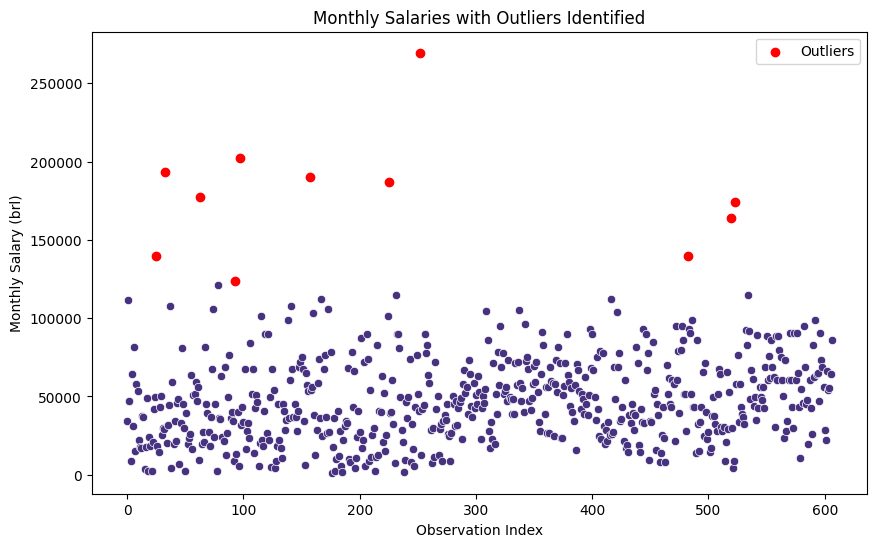

In [252]:
# Calculando o IQR
Q1 = df['monthly_salary_brl'].quantile(0.25)
Q3 = df['monthly_salary_brl'].quantile(0.75)
IQR = Q3 - Q1

# Definindo os limites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificando outliers
outliers = df[(df['monthly_salary_brl'] < lower_bound) | (df['monthly_salary_brl'] > upper_bound)]

# Plotando o gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.index, y='monthly_salary_brl', data=df)

# Marcando os outliers
plt.scatter(outliers.index, outliers['monthly_salary_brl'], color='red', label='Outliers')

plt.title('Monthly Salaries with Outliers Identified')
plt.xlabel('Observation Index')
plt.ylabel('Monthly Salary (brl)')
plt.legend()
plt.show()

**Conclusões**

A análise da distribuição salarial revelou uma complexa interação entre diversas variáveis, como categoria profissional, experiência e modalidade de trabalho. Observou-se que:

- A remuneração varia significativamente entre as categorias, onde profissionais de áreas como Engenharia e Liderança tendem a receber salários mais altos e com menor variabilidade, enquanto outras categorias apresentam uma distribuição salarial mais ampla.
- A experiência é um fator determinante e profissionais com mais experiência, em geral, recebem salários mais elevados, especialmente em áreas técnicas. No entanto, outros fatores como a especialização e a demanda do mercado também influenciam a remuneração.
- O trabalho remoto se consolidou, a modalidade de trabalho remoto apresentou um crescimento expressivo nos anos 2020, 2021 e 2022, com diferentes categorias e setores adotando essa prática em maior ou menor grau (muito deve-se à pandemia). 
- A relação entre salário e trabalho remoto é complexa, e a análise não encontrou uma relação direta e simples entre o trabalho remoto e o salário, sugerindo que outros fatores podem estar influenciando essa relação.
- A presença de outliers na distribuição salarial indica a existência de valores atípicos que podem distorcer as medidas estatísticas e mascarar padrões subjacentes nos dados. Esses outliers podem ser resultado de erros de coleta de dados, características profissionais únicas (como habilidades altamente especializadas ou cargos de alta liderança) ou até mesmo eventos aleatórios. Ao considerar os outliers, a análise sugere que a distribuição salarial é mais complexa do que aparenta inicialmente e que fatores não considerados nesta análise podem estar influenciando a remuneração.

Em resumo, a remuneração é determinada por uma combinação de fatores, e a compreensão dessas dinâmicas é fundamental para entender o mercado de trabalho atual e tomar decisões estratégicas tanto para empresas quanto para profissionais. A presença de outliers ressalta a importância de investigações mais aprofundadas para entender as particularidades do mercado de trabalho e as razões por trás das disparidades salariais.



